## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  67.939752   602.062093  0.530296  1.562626  1.393119
1  73.419241  1579.412467  0.757480  8.831799  1.281749
2  73.223763  1683.402723  0.517811  2.344044  1.496704
3  37.105188   824.571208  0.096973  9.987801  1.124195
4  52.310563  1658.636260  0.281137  9.915224  1.419482


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.7668334	total: 58.8ms	remaining: 58.7s
1:	learn: 0.7610455	total: 59.3ms	remaining: 29.6s
2:	learn: 0.7547450	total: 59.8ms	remaining: 19.9s
3:	learn: 0.7512576	total: 60.4ms	remaining: 15.1s
4:	learn: 0.7462111	total: 60.9ms	remaining: 12.1s
5:	learn: 0.7406881	total: 61.3ms	remaining: 10.2s
6:	learn: 0.7364898	total: 61.8ms	remaining: 8.76s
7:	learn: 0.7323661	total: 62.2ms	remaining: 7.71s
8:	learn: 0.7287830	total: 62.7ms	remaining: 6.91s
9:	learn: 0.7249565	total: 63.1ms	remaining: 6.25s
10:	learn: 0.7188960	total: 63.8ms	remaining: 5.73s
11:	learn: 0.7133385	total: 64.3ms	remaining: 5.3s
12:	learn: 0.7092253	total: 64.7ms	remaining: 4.91s
13:	learn: 0.7040770	total: 65.2ms	remaining: 4.59s
14:	learn: 0.7003078	total: 65.8ms	remaining: 4.32s
15:	learn: 0.6960357	total: 66.2ms	remaining: 4.07s
16:	learn: 0.6911663	total: 66.6ms	remaining: 3.85s
17:	learn: 0.6870346	total: 67.1ms	remaining: 3.66s
18:	learn: 0.6815765	total: 67.5ms	remaining:

114:	learn: 0.4164776	total: 106ms	remaining: 817ms
115:	learn: 0.4146245	total: 107ms	remaining: 813ms
116:	learn: 0.4135342	total: 107ms	remaining: 808ms
117:	learn: 0.4111990	total: 107ms	remaining: 804ms
118:	learn: 0.4092679	total: 108ms	remaining: 799ms
119:	learn: 0.4073855	total: 108ms	remaining: 795ms
120:	learn: 0.4060068	total: 109ms	remaining: 790ms
121:	learn: 0.4037742	total: 109ms	remaining: 785ms
122:	learn: 0.4020522	total: 109ms	remaining: 780ms
123:	learn: 0.3992667	total: 110ms	remaining: 775ms
124:	learn: 0.3975724	total: 110ms	remaining: 772ms
125:	learn: 0.3959397	total: 111ms	remaining: 767ms
126:	learn: 0.3948981	total: 111ms	remaining: 763ms
127:	learn: 0.3925919	total: 111ms	remaining: 758ms
128:	learn: 0.3907883	total: 112ms	remaining: 754ms
129:	learn: 0.3882576	total: 112ms	remaining: 750ms
130:	learn: 0.3866339	total: 112ms	remaining: 746ms
131:	learn: 0.3847003	total: 113ms	remaining: 743ms
132:	learn: 0.3836652	total: 113ms	remaining: 739ms
133:	learn: 

294:	learn: 0.2190031	total: 185ms	remaining: 443ms
295:	learn: 0.2179773	total: 186ms	remaining: 442ms
296:	learn: 0.2174321	total: 186ms	remaining: 441ms
297:	learn: 0.2166880	total: 187ms	remaining: 439ms
298:	learn: 0.2159101	total: 187ms	remaining: 439ms
299:	learn: 0.2156784	total: 188ms	remaining: 438ms
300:	learn: 0.2149165	total: 188ms	remaining: 436ms
301:	learn: 0.2142061	total: 188ms	remaining: 435ms
302:	learn: 0.2139365	total: 189ms	remaining: 435ms
303:	learn: 0.2132260	total: 189ms	remaining: 433ms
304:	learn: 0.2126096	total: 190ms	remaining: 432ms
305:	learn: 0.2119867	total: 191ms	remaining: 434ms
306:	learn: 0.2109459	total: 192ms	remaining: 434ms
307:	learn: 0.2102729	total: 192ms	remaining: 432ms
308:	learn: 0.2093995	total: 193ms	remaining: 431ms
309:	learn: 0.2086715	total: 193ms	remaining: 430ms
310:	learn: 0.2084241	total: 194ms	remaining: 429ms
311:	learn: 0.2081698	total: 194ms	remaining: 428ms
312:	learn: 0.2074630	total: 194ms	remaining: 426ms
313:	learn: 

529:	learn: 0.1101716	total: 288ms	remaining: 256ms
530:	learn: 0.1100479	total: 289ms	remaining: 255ms
531:	learn: 0.1099259	total: 289ms	remaining: 254ms
532:	learn: 0.1094463	total: 290ms	remaining: 254ms
533:	learn: 0.1093969	total: 290ms	remaining: 253ms
534:	learn: 0.1093482	total: 291ms	remaining: 253ms
535:	learn: 0.1089541	total: 291ms	remaining: 252ms
536:	learn: 0.1089067	total: 291ms	remaining: 251ms
537:	learn: 0.1088600	total: 292ms	remaining: 251ms
538:	learn: 0.1087433	total: 292ms	remaining: 250ms
539:	learn: 0.1086181	total: 293ms	remaining: 249ms
540:	learn: 0.1085040	total: 293ms	remaining: 249ms
541:	learn: 0.1080489	total: 294ms	remaining: 248ms
542:	learn: 0.1080034	total: 294ms	remaining: 247ms
543:	learn: 0.1079585	total: 294ms	remaining: 247ms
544:	learn: 0.1078369	total: 295ms	remaining: 246ms
545:	learn: 0.1077173	total: 301ms	remaining: 250ms
546:	learn: 0.1072744	total: 301ms	remaining: 249ms
547:	learn: 0.1072306	total: 301ms	remaining: 249ms
548:	learn: 

705:	learn: 0.0688003	total: 368ms	remaining: 153ms
706:	learn: 0.0685476	total: 368ms	remaining: 153ms
707:	learn: 0.0682718	total: 369ms	remaining: 152ms
708:	learn: 0.0681640	total: 369ms	remaining: 152ms
709:	learn: 0.0680579	total: 370ms	remaining: 151ms
710:	learn: 0.0678422	total: 370ms	remaining: 151ms
711:	learn: 0.0677373	total: 371ms	remaining: 150ms
712:	learn: 0.0675254	total: 371ms	remaining: 149ms
713:	learn: 0.0674334	total: 372ms	remaining: 149ms
714:	learn: 0.0673427	total: 372ms	remaining: 148ms
715:	learn: 0.0671593	total: 372ms	remaining: 148ms
716:	learn: 0.0668142	total: 373ms	remaining: 147ms
717:	learn: 0.0665555	total: 373ms	remaining: 147ms
718:	learn: 0.0664661	total: 374ms	remaining: 146ms
719:	learn: 0.0663779	total: 374ms	remaining: 146ms
720:	learn: 0.0660418	total: 375ms	remaining: 145ms
721:	learn: 0.0659552	total: 375ms	remaining: 144ms
722:	learn: 0.0658698	total: 376ms	remaining: 144ms
723:	learn: 0.0655416	total: 376ms	remaining: 143ms
724:	learn: 

930:	learn: 0.0360033	total: 470ms	remaining: 34.8ms
931:	learn: 0.0358932	total: 470ms	remaining: 34.3ms
932:	learn: 0.0358010	total: 471ms	remaining: 33.8ms
933:	learn: 0.0356925	total: 471ms	remaining: 33.3ms
934:	learn: 0.0356021	total: 471ms	remaining: 32.8ms
935:	learn: 0.0354952	total: 472ms	remaining: 32.3ms
936:	learn: 0.0353901	total: 472ms	remaining: 31.8ms
937:	learn: 0.0353054	total: 473ms	remaining: 31.2ms
938:	learn: 0.0352022	total: 473ms	remaining: 30.7ms
939:	learn: 0.0351141	total: 473ms	remaining: 30.2ms
940:	learn: 0.0350124	total: 474ms	remaining: 29.7ms
941:	learn: 0.0349200	total: 474ms	remaining: 29.2ms
942:	learn: 0.0348382	total: 475ms	remaining: 28.7ms
943:	learn: 0.0347097	total: 475ms	remaining: 28.2ms
944:	learn: 0.0345947	total: 475ms	remaining: 27.7ms
945:	learn: 0.0345149	total: 476ms	remaining: 27.1ms
946:	learn: 0.0344279	total: 476ms	remaining: 26.6ms
947:	learn: 0.0343158	total: 476ms	remaining: 26.1ms
948:	learn: 0.0342304	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

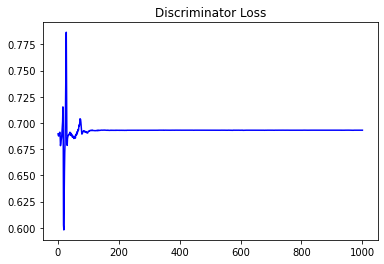

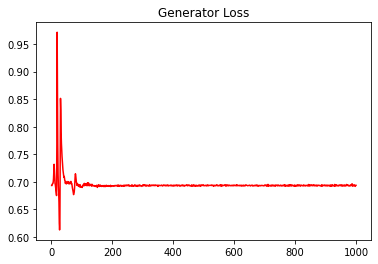

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.5858329591237437


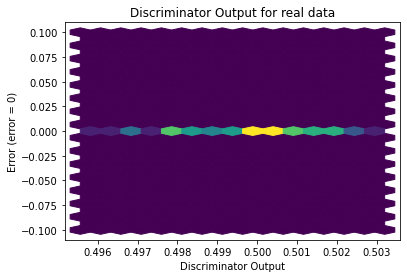

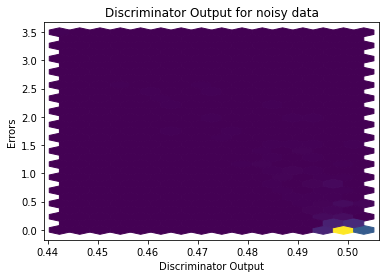

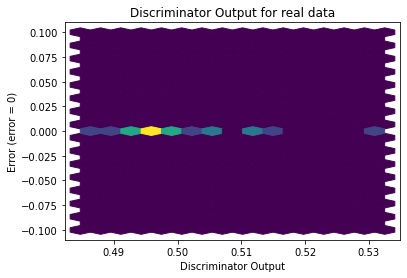

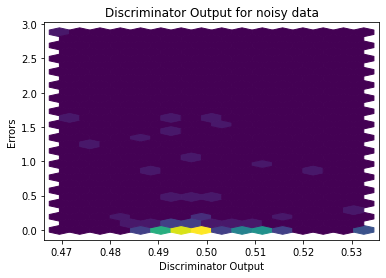

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


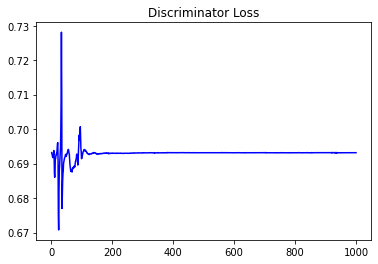

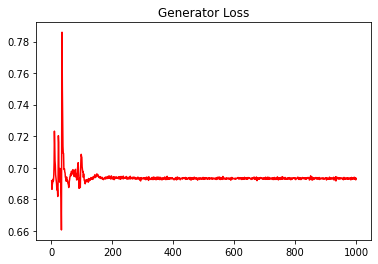

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1.556236196102199


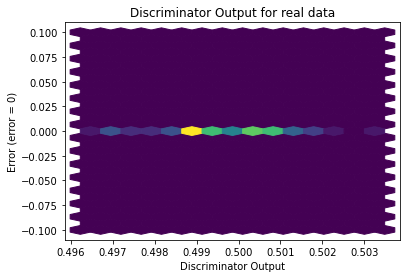

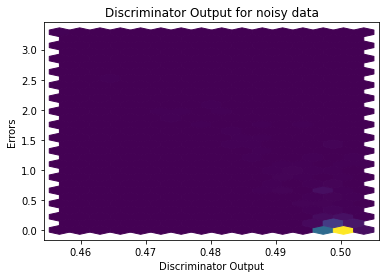

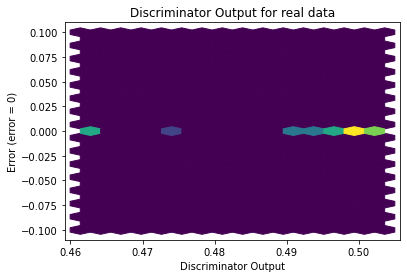

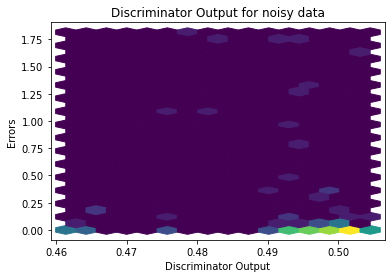

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2369]], requires_grad=True)
